**Unemployment Disparity Among Gender and Race**




**Introducton:**

Unemployment is defined as the state in which individuals within the labor force are without jobs but are actively seeking work and available to start employment Borjas (2020). Unemployment could be attributed to frictional, seasonal, cyclical among other reseasons. Each of these factors reflects different underlying economic conditions . Unemployment is a critical indicator of a country's economic health and labor market efficiency. High levels of unemployment can have widespread implications, including reduced household incomes, increased poverty, and slower economic growth. Bureau of statistics (2024) analysis revealed women suffered higher unemployment rate during the covid as compared to their male counterparts. The study emphasizes the need for gender-focused policies during public health crises. To some extent, data has shown that there is huge unemployment disparity based on gender. This proposal aims to understand how unemployment affects different groups in society on yearly basis, based on race and gender. By focusing on Black and White populations, it highlights the disparities in job opportunities and sheds light on whether certain groups face greater challenges in the labor market. This understanding can guide efforts to create fairer economic systems and policies that ensure equal opportunities for everyone, regardless of race or gender.









Dataset:

I will be working with the USA Unemployment Rates by Demographics & Race dataset from kaggle https://www.kaggle.com/datasets/asaniczka/unemployment-rates-by-demographics-1978-2023. This dataset provides unemployment rates for various demographic groups in the United States, including age groups (e.g., 16-24, 25-54), education levels (e.g., high school, bachelor's degree), gender, and race, spanning from December 1978 to July 2023. It is sourced from the Economic Policy Institute’s State of Working America Data Library and the Federal Reserve Bank of St. Louis.










Goals:

For the purpose of this research, I will measure as well as visualize the disparities between people of different gender and race (white and black) with different levels of education.

**Dataset Loading & Description**

In [1]:
import pandas as pd
import sqlite3


In [2]:
df = pd.read_csv('unemployed_population.csv')
df.head()


,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


This dataset has a total of 537 rows and 122 columns


Due to the size of the data I will be listing only variables relevant to my analysis.



Variables:

Date Column:

Black_men_high_school: These are the population of black men who only attained up to high school qualification.


Black_women_high_school: Population of black women with high school qualification.


White_men_high_school: White men who have bachelor's degree.


White_women_high_school: White women who have bachelor's degree.



black_men_bachelor's_degree: Black mean who have only bachelor's degree



black_women_bachelor's_degree: Black women with only bachlor's degree


White_men_bachelor's_degree: White men only bachelor's degree.


White_women_bachelor's_degree: White women with just the bachelor's degree


black_men_advanced_degree: Black men who have either a master's or doctorate degree.


black_women_advanced_degree: Black women who have either a master's or doctorate degree.


White_men_advanced_degree: White men who have either a master's or doctorate degree.


White_women_advanced_degree: White women who have either a master's or doctorate degree.



The dataset also has columns for black and white men and women which spans 16-65+



In [3]:
# Extracting relevant columns
columns_to_extract = [
    'date',
    'black_men_high_school', 'black_women_high_school',
    "black_men_bachelor's_degree", "black_women_bachelor's_degree",
    "black_men_advanced_degree", "black_women_advanced_degree",
    'white_men_high_school', 'white_women_high_school',
    "white_men_bachelor's_degree", "white_women_bachelor's_degree",
    "white_men_advanced_degree", "white_women_advanced_degree",
    "black_men_16-24", "black_women_16-24",
    "black_men_25-54", "black_women_25-54",
    "black_men_55-64", "black_women_55-64",
    "black_men_65+", "black_women_65+",
    "white_men_16-24", "white_women_16-24",
    "white_men_25-54", "white_women_25-54",
    "white_men_55-64", "white_women_55-64",
    "white_men_65+", "white_women_65+"
]



# Extracting the required columns from the dataset
selected_data = df[columns_to_extract]

# Adjusting the index to start at 1
selected_data.index = selected_data.index + 1

# Displaying the updated DataFrame
selected_data.head()







,date,black_men_high_school,black_women_high_school,black_men_bachelor's_degree,black_women_bachelor's_degree,black_men_advanced_degree,black_women_advanced_degree,white_men_high_school,white_women_high_school,white_men_bachelor's_degree,...,black_men_65+,black_women_65+,white_men_16-24,white_women_16-24,white_men_25-54,white_women_25-54,white_men_55-64,white_women_55-64,white_men_65+,white_women_65+
1,2023-07-01,7.5,8.3,2.9,3.8,2.3,2.0,3.8,3.7,2.1,...,3.9,3.9,7.0,5.6,2.5,2.4,2.1,2.0,2.4,2.5
2,2023-06-01,7.5,8.3,3.0,3.7,2.2,2.0,3.8,3.7,2.1,...,3.7,4.1,7.0,5.6,2.5,2.4,2.1,2.0,2.5,2.6
3,2023-05-01,7.5,8.0,3.0,3.8,2.1,2.0,3.8,3.8,2.1,...,3.7,4.1,7.0,5.8,2.5,2.4,2.1,2.1,2.5,2.6
4,2023-04-01,7.3,8.0,3.1,3.9,2.0,1.9,3.8,3.8,2.1,...,3.6,4.1,7.0,5.8,2.5,2.4,2.2,2.1,2.5,2.6
5,2023-03-01,7.4,8.0,3.3,4.0,2.0,1.9,3.9,3.9,2.1,...,3.6,4.3,7.1,5.9,2.5,2.4,2.2,2.1,2.5,2.6


The new data contains 536 rows and 29 columns


**Data Exploration**

In [4]:
selected_data.describe()

,black_men_high_school,black_women_high_school,black_men_bachelor's_degree,black_women_bachelor's_degree,black_men_advanced_degree,black_women_advanced_degree,white_men_high_school,white_women_high_school,white_men_bachelor's_degree,white_women_bachelor's_degree,...,black_men_65+,black_women_65+,white_men_16-24,white_women_16-24,white_men_25-54,white_women_25-54,white_men_55-64,white_women_55-64,white_men_65+,white_women_65+
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,...,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,13.049067,12.279851,5.193284,4.885261,3.690858,3.091978,5.957836,5.373694,2.828358,3.020709,...,6.645149,5.567537,11.209701,9.146642,4.199440,4.111194,3.661194,3.342164,3.301679,3.506157
std,3.488470,2.981269,2.027971,1.524696,1.196775,1.195721,1.976321,1.411607,0.845670,0.825210,...,2.191226,1.437999,2.594022,1.936542,1.405842,1.147165,1.160561,0.997180,1.102392,1.129577
min,7.300000,7.100000,2.300000,2.300000,1.400000,1.300000,3.400000,3.400000,1.600000,1.900000,...,3.300000,2.700000,7.000000,5.600000,2.300000,2.400000,2.100000,1.900000,1.800000,2.000000
25%,10.700000,10.200000,3.800000,3.700000,2.775000,2.100000,4.600000,4.300000,2.200000,2.400000,...,4.900000,4.575000,9.400000,7.800000,3.200000,3.200000,2.800000,2.675000,2.600000,2.800000
50%,11.900000,11.800000,4.600000,4.300000,3.500000,2.800000,5.400000,5.000000,2.600000,2.800000,...,6.100000,5.400000,10.700000,8.900000,3.800000,3.800000,3.300000,3.100000,3.000000,3.100000
75%,15.200000,14.300000,6.025000,6.000000,4.600000,3.700000,6.725000,6.100000,3.300000,3.500000,...,8.300000,6.400000,12.400000,10.400000,4.900000,4.925000,4.300000,3.800000,3.400000,3.700000
max,22.600000,20.700000,11.500000,8.500000,7.200000,6.200000,12.100000,9.200000,5.300000,6.300000,...,11.900000,10.800000,18.300000,13.700000,8.300000,6.900000,7.200000,6.800000,6.400000,8.100000


In [5]:
selected_data.dtypes

,0
date,object
black_men_high_school,float64
black_women_high_school,float64
black_men_bachelor's_degree,float64
black_women_bachelor's_degree,float64
black_men_advanced_degree,float64
black_women_advanced_degree,float64
white_men_high_school,float64
white_women_high_school,float64
white_men_bachelor's_degree,float64


In [6]:
selected_data.shape

(536, 29)

I will go ahead to change date column to a date time format and create a column for years for further analysis.

In [7]:
# Converting the 'date' column to a datetime format and extracting the year and sanity check

selected_data['date'] = pd.to_datetime(selected_data['date'])
selected_data['year'] = selected_data['date'].dt.year

# Displaying the updated
selected_data.head()

<ipython-input-7-4cfb37d7202f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['date'] = pd.to_datetime(selected_data['date'])
<ipython-input-7-4cfb37d7202f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['year'] = selected_data['date'].dt.year


,date,black_men_high_school,black_women_high_school,black_men_bachelor's_degree,black_women_bachelor's_degree,black_men_advanced_degree,black_women_advanced_degree,white_men_high_school,white_women_high_school,white_men_bachelor's_degree,...,black_women_65+,white_men_16-24,white_women_16-24,white_men_25-54,white_women_25-54,white_men_55-64,white_women_55-64,white_men_65+,white_women_65+,year
1,2023-07-01,7.5,8.3,2.9,3.8,2.3,2.0,3.8,3.7,2.1,...,3.9,7.0,5.6,2.5,2.4,2.1,2.0,2.4,2.5,2023
2,2023-06-01,7.5,8.3,3.0,3.7,2.2,2.0,3.8,3.7,2.1,...,4.1,7.0,5.6,2.5,2.4,2.1,2.0,2.5,2.6,2023
3,2023-05-01,7.5,8.0,3.0,3.8,2.1,2.0,3.8,3.8,2.1,...,4.1,7.0,5.8,2.5,2.4,2.1,2.1,2.5,2.6,2023
4,2023-04-01,7.3,8.0,3.1,3.9,2.0,1.9,3.8,3.8,2.1,...,4.1,7.0,5.8,2.5,2.4,2.2,2.1,2.5,2.6,2023
5,2023-03-01,7.4,8.0,3.3,4.0,2.0,1.9,3.9,3.9,2.1,...,4.3,7.1,5.9,2.5,2.4,2.2,2.1,2.5,2.6,2023


In [8]:
# Using .loc to avoid the warning
selected_data.loc[:, 'date'] = pd.to_datetime(selected_data['date'])
selected_data.loc[:, 'year'] = selected_data['date'].dt.year

# Display the updated DataFrame
selected_data.head()


,date,black_men_high_school,black_women_high_school,black_men_bachelor's_degree,black_women_bachelor's_degree,black_men_advanced_degree,black_women_advanced_degree,white_men_high_school,white_women_high_school,white_men_bachelor's_degree,...,black_women_65+,white_men_16-24,white_women_16-24,white_men_25-54,white_women_25-54,white_men_55-64,white_women_55-64,white_men_65+,white_women_65+,year
1,2023-07-01,7.5,8.3,2.9,3.8,2.3,2.0,3.8,3.7,2.1,...,3.9,7.0,5.6,2.5,2.4,2.1,2.0,2.4,2.5,2023
2,2023-06-01,7.5,8.3,3.0,3.7,2.2,2.0,3.8,3.7,2.1,...,4.1,7.0,5.6,2.5,2.4,2.1,2.0,2.5,2.6,2023
3,2023-05-01,7.5,8.0,3.0,3.8,2.1,2.0,3.8,3.8,2.1,...,4.1,7.0,5.8,2.5,2.4,2.1,2.1,2.5,2.6,2023
4,2023-04-01,7.3,8.0,3.1,3.9,2.0,1.9,3.8,3.8,2.1,...,4.1,7.0,5.8,2.5,2.4,2.2,2.1,2.5,2.6,2023
5,2023-03-01,7.4,8.0,3.3,4.0,2.0,1.9,3.9,3.9,2.1,...,4.3,7.1,5.9,2.5,2.4,2.2,2.1,2.5,2.6,2023


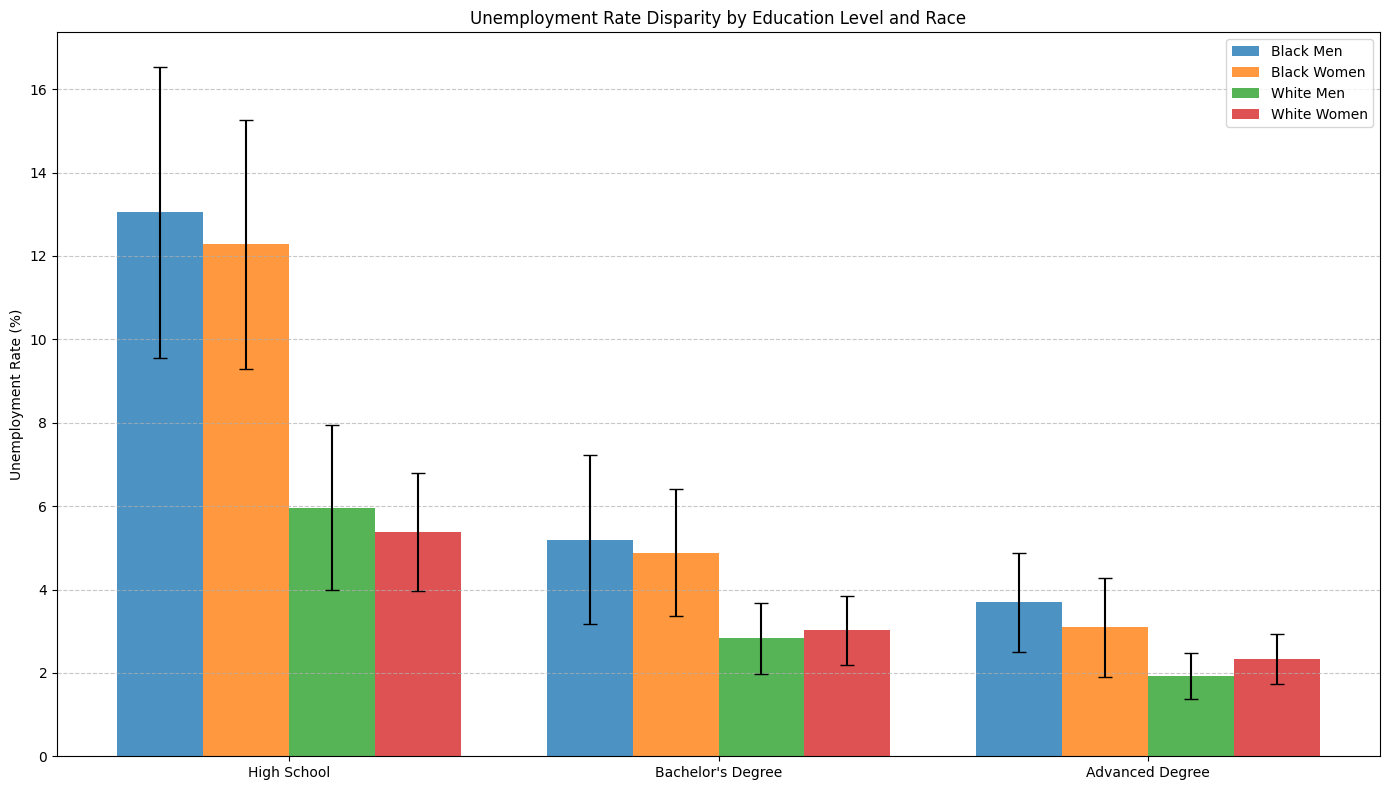

In [9]:
import matplotlib.pyplot as plt

# Categories
categories = ['High School', "Bachelor's Degree", "Advanced Degree"]

# Calculating means for Black and White individuals
black_male_means = [
    selected_data['black_men_high_school'].mean(),
    selected_data['black_men_bachelor\'s_degree'].mean(),
    selected_data['black_men_advanced_degree'].mean()
]
black_female_means = [
    selected_data['black_women_high_school'].mean(),
    selected_data['black_women_bachelor\'s_degree'].mean(),
    selected_data['black_women_advanced_degree'].mean()
]
white_male_means = [
    selected_data['white_men_high_school'].mean(),
    selected_data['white_men_bachelor\'s_degree'].mean(),
    selected_data['white_men_advanced_degree'].mean()
]
white_female_means = [
    selected_data['white_women_high_school'].mean(),
    selected_data['white_women_bachelor\'s_degree'].mean(),
    selected_data['white_women_advanced_degree'].mean()
]

# Calculating standard deviations for Black and White individuals
black_male_stds = [
    selected_data['black_men_high_school'].std(),
    selected_data['black_men_bachelor\'s_degree'].std(),
    selected_data['black_men_advanced_degree'].std()
]
black_female_stds = [
    selected_data['black_women_high_school'].std(),
    selected_data['black_women_bachelor\'s_degree'].std(),
    selected_data['black_women_advanced_degree'].std()
]
white_male_stds = [
    selected_data['white_men_high_school'].std(),
    selected_data['white_men_bachelor\'s_degree'].std(),
    selected_data['white_men_advanced_degree'].std()
]
white_female_stds = [
    selected_data['white_women_high_school'].std(),
    selected_data['white_women_bachelor\'s_degree'].std(),
    selected_data['white_women_advanced_degree'].std()
]

# Bar width and positions
bar_width = 0.2
x = range(len(categories))

# Creating the bar chart with error bars
plt.figure(figsize=(14, 8))
plt.bar(x, black_male_means, width=bar_width, label='Black Men', alpha=0.8, yerr=black_male_stds, capsize=5)
plt.bar([p + bar_width for p in x], black_female_means, width=bar_width, label='Black Women', alpha=0.8, yerr=black_female_stds, capsize=5)
plt.bar([p + 2 * bar_width for p in x], white_male_means, width=bar_width, label='White Men', alpha=0.8, yerr=white_male_stds, capsize=5)
plt.bar([p + 3 * bar_width for p in x], white_female_means, width=bar_width, label='White Women', alpha=0.8, yerr=white_female_stds, capsize=5)

# Adding labels, title, and legend
plt.xticks([p + 1.5 * bar_width for p in x], categories)
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Disparity by Education Level and Race')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Having plotted the disparity data, the results show that there is not much difference between men and women of the same race. On the other hand, there is a steep margin in unemployment rate between black vs white racial group with high school qualification.

Considering those with bachelor's and advanced degree, the results show that black men and women still suffer the highest unemployment disparity when compared to the white. Although not as steep as those who have only high school qualification.


In order to know which year recorded the highest unemployment rate, I will create a year column from the date column, collect the means for each year from the 1980 to 2023. Then I'll go ahead to visualize the data.

In [10]:
# Grouping the data by year and calculating the mean for each year
yearly_data = selected_data.groupby('year').mean().reset_index()

# Displaying the yearly aggregated data
yearly_data.tail()


,year,date,black_men_high_school,black_women_high_school,black_men_bachelor's_degree,black_women_bachelor's_degree,black_men_advanced_degree,black_women_advanced_degree,white_men_high_school,white_women_high_school,...,black_men_65+,black_women_65+,white_men_16-24,white_women_16-24,white_men_25-54,white_women_25-54,white_men_55-64,white_women_55-64,white_men_65+,white_women_65+
41,2019,2019-06-16 12:00:00.000000000,9.125000,7.266667,3.616667,3.383333,2.025000,2.183333,3.958333,3.775000,...,5.025000,4.708333,7.750000,6.108333,2.641667,2.525000,2.416667,2.408333,2.700000,2.983333
42,2020,2020-06-16 08:00:00.000000000,11.775000,11.225000,5.033333,4.908333,3.425000,3.491667,6.000000,6.291667,...,7.900000,6.583333,10.291667,9.258333,4.133333,4.208333,3.750000,4.441667,4.358333,5.241667
43,2021,2021-06-16 12:00:00.000000000,13.841667,13.050000,7.091667,5.941667,4.775000,4.566667,6.991667,7.025000,...,9.325000,8.575000,10.791667,9.275000,4.991667,4.825000,4.666667,4.991667,4.933333,5.950000
44,2022,2022-06-16 12:00:00.000000000,9.533333,9.583333,3.683333,4.316667,2.433333,2.366667,4.583333,4.466667,...,5.375000,4.708333,7.791667,5.866667,3.050000,2.850000,2.708333,2.691667,3.050000,3.075000
45,2023,2023-04-01 06:51:25.714285824,7.485714,8.157143,3.085714,3.871429,2.128571,1.957143,3.857143,3.842857,...,3.742857,4.214286,7.100000,5.800000,2.500000,2.400000,2.157143,2.071429,2.528571,2.571429


Visualization

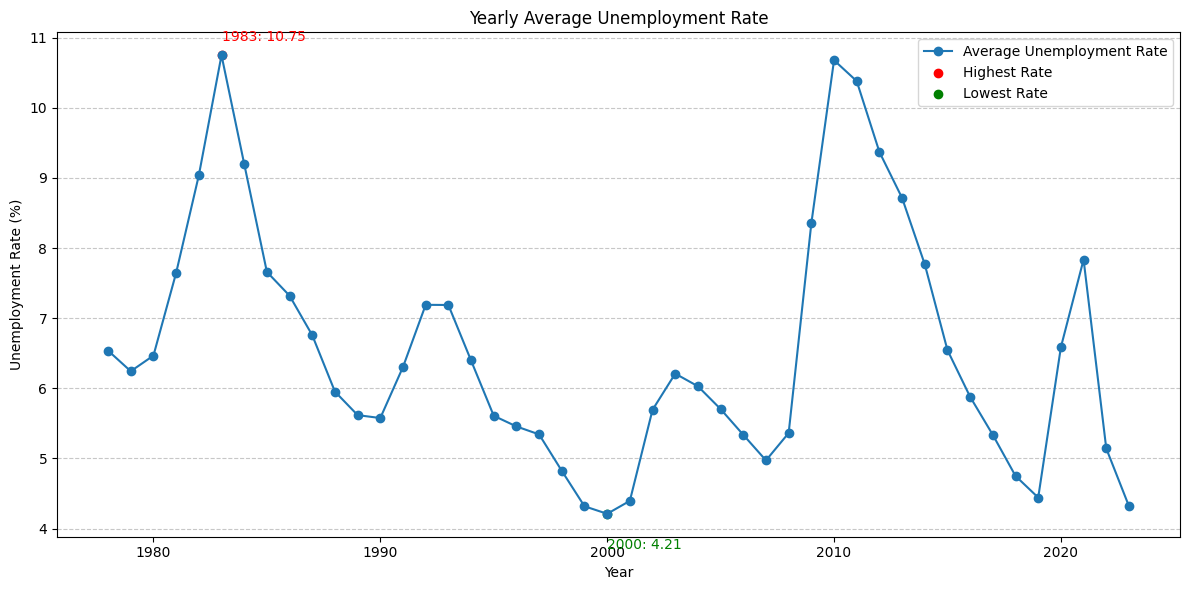

In [11]:
# Calculating the mean unemployment rate across all demographic groups
yearly_data['mean_unemployment_rate'] = yearly_data[
    ['black_men_high_school', 'black_women_high_school',
     "black_men_bachelor's_degree", "black_women_bachelor's_degree",
     'white_men_high_school', 'white_women_high_school',
     "white_men_bachelor's_degree", "white_women_bachelor's_degree"]
].mean(axis=1)

# Visualization: Yearly average unemployment rates
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['mean_unemployment_rate'], marker='o', label='Average Unemployment Rate')

# Highlighting the highest and lowest unemployment rates
highest_year = yearly_data.loc[yearly_data['mean_unemployment_rate'].idxmax()]
lowest_year = yearly_data.loc[yearly_data['mean_unemployment_rate'].idxmin()]

# Annotating the highest and lowest points
plt.scatter(highest_year['year'], highest_year['mean_unemployment_rate'], color='red', label='Highest Rate')
plt.scatter(lowest_year['year'], lowest_year['mean_unemployment_rate'], color='green', label='Lowest Rate')
plt.text(highest_year['year'], highest_year['mean_unemployment_rate'] + 0.2,
         f"{highest_year['year']}: {highest_year['mean_unemployment_rate']:.2f}", color='red')
plt.text(lowest_year['year'], lowest_year['mean_unemployment_rate'] - 0.5,
         f"{lowest_year['year']}: {lowest_year['mean_unemployment_rate']:.2f}", color='green')

# Adding labels and title
plt.title('Yearly Average Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Displaying the plot
plt.show()


The data shows the highest unemployment rate was recorded in the year 1983 at 10.75%. And the lowest unemployment rate was in the year 2000 at 4.21%.

 **References**

1. Borjas, G. J. (2020). Labor Economics (8th ed.). McGraw Hill Education.

2. The Bureau of Statistics, (2024). The Employment Situation — NOVEMBER 2024 . USDL-24-2477. https://www.bls.gov/news.release/pdf/empsit.pdf